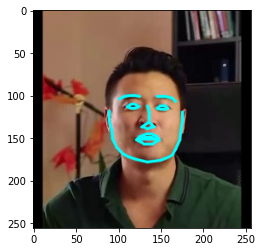

In [13]:
def drawPolyline(image, landmarks, start, end, isClosed=False):
    points = []
    for i in range(start, end+1):
        point = [landmarks[i][0], landmarks[i][1]]
        points.append(point)

    points = np.array(points, dtype=np.int32)
    cv2.polylines(image, [points], isClosed, (0, 255, 255), 2, 16)

# Draw lines around landmarks corresponding to different facial regions
def drawPolylines(image, landmarks):
    drawPolyline(image, landmarks, 0, 16)           # Jaw line
    drawPolyline(image, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(image, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(image, landmarks, 27, 30)          # Nose bridge
    drawPolyline(image, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(image, landmarks, 36, 41, True)    # Left eye
    drawPolyline(images, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(image, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(image, landmarks, 60, 67, True)    # Inner lip
    
dir_path = '/home/aditya/Desktop/video_vqvae/VQVAE2-Refact/temp/00001'
import os.path as osp
filename = '010.jpg'
landmark = '010_landmarks.npz'

filename = osp.join(dir_path, filename)
landmark = osp.join(dir_path, landmark)

import numpy as np
import cv2

landmarks = np.load(landmark, allow_pickle=True)['landmark']
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

drawPolylines(image, landmarks)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image)

# the landmarks and the images are of different dimensions
# this is perfect!!

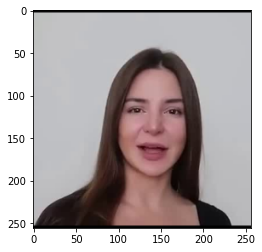

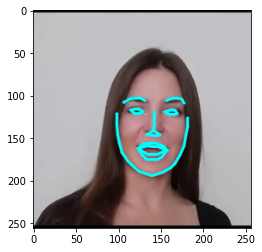

In [7]:
def resize_frame(frame, resize_dim=256):
    h, w, _ = frame.shape

    if h > w:
        padw, padh = (h-w)//2, 0
    else:
        padw, padh = 0, (w-h)//2

    padded = cv2.copyMakeBorder(frame, padh, padh, padw, padw, cv2.BORDER_CONSTANT, value=0)
    padded = cv2.resize(padded, (resize_dim, resize_dim), interpolation=cv2.INTER_LINEAR)

    return padded

image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

resized = resize_frame(image)
plt.figure()
plt.imshow(resized)

# draw the landmarks now 
drawPolylines(resized, landmarks)
plt.figure()
plt.imshow(resized) # these landmarks are accurate -- # there is a slight bit of padding that has been added